In [56]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samishiraz00","key":"46891157b5e279e456473375fee471b9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 30.0MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 28.4MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.9MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 56.9MB/s]


In [5]:
import numpy as np
import pandas as pd

**"Handling Categorical Features"**

**Fequently Category Imputation**

In [8]:
df = pd.read_csv("/content/train.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [16]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [19]:
# percentage of NAN values

df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [20]:
df.shape

(1460, 4)

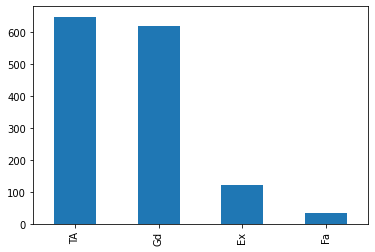

In [27]:
df['BsmtQual'].value_counts().plot.bar()

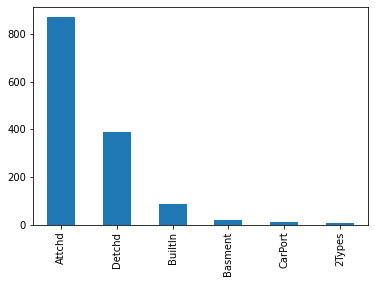

In [28]:
df['GarageType'].value_counts().plot.bar()

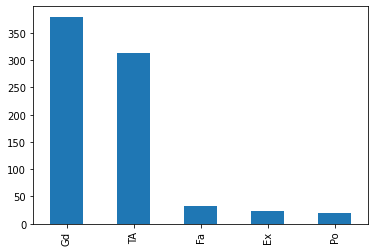

In [29]:
df['FireplaceQu'].value_counts().plot.bar()

In [38]:
def input_nan(df, variable):
  frequent = df[variable].value_counts().index[0]
  df[variable].fillna(frequent, inplace=True)

In [41]:
input_nan(df, 'BsmtQual')
input_nan(df, 'FireplaceQu')
input_nan(df, 'GarageType')

In [42]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


**Capturing NAN Importance**

In [44]:
df = pd.read_csv("/content/train.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [45]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(), 1, 0)
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
df['GarageType_var'] = np.where(df['GarageType'].isnull(), 1, 0)

In [46]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [48]:
fre_bst=df['BsmtQual'].mode()[0]
fre_fire=df['FireplaceQu'].mode()[0]
fre_Gara=df['GarageType'].mode()[0]

In [51]:
df['BsmtQual'].fillna(fre_bst, inplace=True)

In [52]:
df['FireplaceQu'].fillna(fre_fire, inplace=True)

In [53]:
df['GarageType'].fillna(fre_Gara, inplace=True)

In [54]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


**Replacing NAN with any other category**

In [55]:
df = pd.read_csv("/content/train.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [57]:
def impute_nan(df, variable):
  df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(), "Missing", df[variable])
  df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(), "Missing", df[variable])
  df['GarageType_var'] = np.where(df['GarageType'].isnull(), "Missing", df[variable])

In [58]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
  impute_nan(df, feature)

In [59]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,NaN,Attchd,208500,Attchd,Missing,Attchd
1,Gd,TA,Attchd,181500,Attchd,Attchd,Attchd
2,Gd,TA,Attchd,223500,Attchd,Attchd,Attchd
3,TA,Gd,Detchd,140000,Detchd,Detchd,Detchd
4,Gd,TA,Attchd,250000,Attchd,Attchd,Attchd


In [62]:
df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'], axis=1, inplace=True)

In [63]:
df.head()

,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,208500,Attchd,Missing,Attchd
1,181500,Attchd,Attchd,Attchd
2,223500,Attchd,Attchd,Attchd
3,140000,Detchd,Detchd,Detchd
4,250000,Attchd,Attchd,Attchd
